In [168]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

Основные определения:

Перцентиль (Percentile) - это статистическая мера, используемая для определения значения, ниже которого попадает определенная доля данных в распределении. Он позволяет разделить данные на процентные доли и определить, какие значения находятся выше или ниже определенного процентного уровня.

Основные перцентили включают в себя:

Медиану (50-й перцентиль): Это значение, которое разделяет данные на две равные части. 50% данных находятся выше медианы, и 50% данных находятся ниже медианы.
Перцентиль 25 (Q1): Это значение, ниже которого находится 25% данных (также называется первым квартилем).
Перцентиль 75 (Q3): Это значение, ниже которого находится 75% данных (также называется третьим квартилем).
Перцентиль 90: Это значение, ниже которого находится 90% данных.
Перцентиль 95: Это значение, ниже которого находится 95% данных.
Перцентиль 99: Это значение, ниже которого находится 99% данных.
Перцентили полезны при анализе данных, потому что они позволяют определить, какие значения являются "типичными" или "выдающимися" в распределении. Например, 25-й перцентиль может указать на нижнюю границу для "низких" значений, а 75-й перцентиль - на верхнюю границу для "высоких" значений. Перцентили также используются для определения выбросов (выдающихся значений) в данных и для идентификации потенциальных аномалий.

Доверительный интервал (Confidence Interval):
Доверительный интервал - это интервал численных значений, который используется для оценки неопределенности вокруг статистической оценки параметра (например, среднего значения) на основе выборочных данных. Он представляет собой диапазон значений, в пределах которого с определенной вероятностью (обычно указывается уровень доверия, например, 95%) находится истинное значение параметра. Чем шире доверительный интервал, тем меньше точность оценки.

Дисперсия (Variance):
Дисперсия - это мера разброса данных относительно их среднего значения. Она измеряет, насколько далеко каждое значение данных отклоняется от среднего значения. Математически, дисперсия вычисляется как средний квадрат разницы между каждым значением и средним значением. Дисперсия используется для оценки изменчивости данных.

Стандартное отклонение (Standard Deviation):
Стандартное отклонение - это корень из дисперсии. Оно измеряет среднее расстояние между каждым значением данных и средним значением. Стандартное отклонение также используется для измерения изменчивости данных, и оно является более интерпретируемым, так как оно выражается в тех же единицах, что и данные.

Ковариация (Covariance):
Ковариация - это мера степени линейной зависимости между двумя случайными переменными. Она показывает, как изменение одной переменной влияет на изменение другой. Если ковариация положительна, это означает, что обе переменные изменяются в одном направлении (одна увеличивается, когда другая увеличивается, и наоборот). Если ковариация отрицательна, это означает, что они изменяются в противоположных направлениях. Коэффициент корреляции Пирсона используется для нормализации ковариации и измерения степени линейной зависимости между переменными.

Параметрические и непараметрические тесты - это две основные категории статистических тестов, которые используются для анализа данных. Они различаются по тому, какие предположения делаются о распределении данных и какие типы данных они могут анализировать.

Параметрические тесты:
Эти тесты предполагают, что данные подчиняются определенному параметрическому (известному) распределению, обычно нормальному распределению. Параметрические тесты обычно работают лучше, когда предположения о нормальности и равенстве дисперсий выполняются.
Примеры параметрических тестов включают t-тесты, ANOVA (анализ дисперсии), регрессионный анализ и другие, которые используют параметры распределения данных.
Параметрические тесты часто более мощные (способные обнаружить статистические различия при наличии таковых), но их результаты зависят от корректности предположений.
Непараметрические тесты:
Непараметрические тесты не предполагают, что данные подчиняются какому-либо конкретному распределению. Они менее чувствительны к отклонениям от нормальности и могут использоваться с данными, которые не подчиняются нормальному распределению.

Эти тесты используют ранги данных вместо самих значений, делая их менее зависимыми от конкретных распределений.
Примеры непараметрических тестов включают тест Уилкоксона-Манна-Уитни (для сравнения двух независимых выборок), тест Вилкоксона (для сравнения двух связанных выборок), критерий Краскела-Уоллиса (аналог ANOVA) и другие.
Выбор между параметрическими и непараметрическими тестами зависит от характера ваших данных и того, выполняются ли предположения параметрических тестов. Если ваши данные соответствуют предположениям параметрических тестов, они часто более мощные и могут обеспечить более точные результаты. В противном случае непараметрические тесты предоставляют более консервативные и устойчивые к нарушениям предположений методы анализа

#Поэтапные действия

#Для биномиальной переменной - например конверсия

In [ ]:
#Расчет мощности выборки

In [80]:

# Ожидаемое улучшение метрики (например, 5%)

expected_effect = 0.05

# Уровень статистической значимости (например, 0.05)
alpha = 0.05

# Мощность теста (например, 0.8)
power = 0.8

# Базовая вероятность события (контрольная группа, например, 0.1)
baseline_conversion_rate = 0.15

# Расчет размера выборки
effect_size = sm.stats.proportion_effectsize(baseline_conversion_rate, baseline_conversion_rate + expected_effect)
required_sample_size = sm.stats.NormalIndPower().solve_power(effect_size, power=power, alpha=alpha)

print(f'Необходимый размер выборки каждой группы: {required_sample_size:.0f}')

Необходимый размер выборки каждой группы: 902


Базовая вероятность события (или базовая конверсионная ставка) представляет собой вероятность, с которой событие происходит в контрольной группе (группе A в A/B-тесте) до внесения каких-либо изменений или вмешательств. Это выступает в качестве отправной точки для сравнения с экспериментальной группой (группой B), в которой применяются изменения или новые методы.

Например, если у вас есть интернет-магазин, и вы хотите провести A/B-тест для определения влияния изменения дизайна кнопки "Купить" на странице продукта на конверсионную ставку (сколько посетителей фактически совершили покупку), то базовая вероятность события будет представлять собой конверсионную ставку на этой странице до внесения изменений.

Ожидаемый эффект (effect size) в контексте A/B-тестирования представляет собой меру различия между группами, которую вы ожидаете обнаружить в результате эксперимента. Это числовое значение, которое позволяет определить, насколько значимо изменение метрики между контрольной и экспериментальной группами.

Размер ожидаемого эффекта может быть определен на основе предварительных исследований, экспертных оценок или бизнес-знаний. Чем больше ожидаемый эффект, тем меньший размер выборки вам потребуется для обнаружения этого эффекта.

Важно отметить, что размер ожидаемого эффекта является важным параметром для расчета мощности теста (statistical power) и размера выборки. Если ожидаемый эффект слишком мал, вам может потребоваться очень большая выборка, чтобы обнаружить его, и наоборот.

Обычно размер ожидаемого эффекта измеряется в стандартных отклонениях (стандартных единицах) или в процентах изменения от базовой конверсионной ставки или среднего значения метрики в контрольной группе.

Примеры размеров ожидаемого эффекта:

Если вы ожидаете увеличение конверсии на 5% после внесения изменений, то размер ожидаемого эффекта составит 0.05.
Если вы ожидаете увеличение среднего чека на 10 долларов после внесения изменений, и стандартное отклонение равно 20 долларам, то размер ожидаемого эффекта составит 10 / 20 = 0.5 стандартных отклонений.
Помните, что выбор размера ожидаемого эффекта требует здравого смысла и анализа бизнес-контекста, чтобы быть реалистичным и практичным.


In [118]:
#Создадим тестовую и контрольную биномиальные выборки 1 - юзер совершил покупку) 0 - юзер не совершил покупку

test_values = np.random.binomial(1,.51,1000)
control_values = np.random.binomial(1,.5,1000)

In [119]:
#Успехи и неудачи в каждой выборке

#Успехи

test_success = test_values.sum()
control_success = control_values.sum()

print('Test:' ,test_success,'Control:' ,control_success)

Test: 546 Control: 529


In [130]:
#Вычисляем доли успехов в каждой группе

test_success_2 = test_values.sum()/len(test_values)
control_success_2 = control_values.sum()/len(control_values)

print('Test:' ,test_success_2*100,'Control:' ,control_success_2*100)

Test: 54.6 Control: 52.900000000000006


#Ручной расчет Z теста 

In [157]:
# Пример данных для группы A и B

n_A = len(test_values)  # Общее количество испытаний (попыток) в группе A
x_A = test_values.sum()   # Количество успехов в группе A

n_B = len(control_values)  # Общее количество испытаний (попыток) в группе B
x_B = control_values.sum()   # Количество успехов в группе B


#Вычислите конверсию (вероятность успеха) для каждой группы:

p_A = x_A / n_A
p_B = x_B / n_B

# Вычисляем стандартное отклонение для каждой группы

std_error_A = np.sqrt(p_A * (1 - p_A) / n_A)
std_error_B = np.sqrt(p_B * (1 - p_B) / n_B)

# Вычисляем z-статистику

#The z-score is a score that measures how many standard deviations a data point is away from the mean. 
#The z-score allows us to determine how usual or unusual a data point is in a distribution. 
#The z-score allows us more easily compare data points for a record across features, especially when the different features have significantly different ranges.


z = (p_A - p_B) / np.sqrt(std_error_A**2 / n_A + std_error_B**2 / n_B)

# Вычисляем p-значение для двустороннего теста

p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))

# Задаем уровень значимости (обычно 0.05)

alpha = 0.05

# Проверяем статистическую значимость

if p_value < alpha:
    print("Есть статистически значимая разница между группами A и B.",p_value)
else:
    print("Нет статистически значимой разницы между группами A и B.",p_value)

Есть статистически значимая разница между группами A и B. 0.0


#Z-тест для разности долей (Z-test for Proportions): Этот тест используется для сравнения долей или пропорций в двух группах. 
#Он помогает определить, есть ли статистически значимая разница между процентами конверсии в контрольной и тестовой группах.

#Так как переменная у нас биномиальная то проводим Z тест T тест для таких величин не подходит


In [153]:
z_score,p_value = sm.stats.proportions_ztest([test_success,control_success],[len(test_values),len(control_values)])
p_value

0.4458150918004189

In [134]:
#Bootstrap 1 ручная версия 

# Количество бутстрэп-подвыборок
n_bootstrap_samples = 1000

# Создаем список, в котором будем хранить разницы между группами для каждой бутстрэп-выборки

bootstrap_differences = []

# Выполняем бутстрэп

for _ in range(n_bootstrap_samples):
    # Генерируем бутстрэп-выборки для обеих групп
    bootstrap_sample_a = np.random.choice(test_values, size=len(test_values), replace=True)
    bootstrap_sample_b = np.random.choice(control_values, size=len(control_values), replace=True)
    
    # Вычисляем метрику для бутстрэп-выборок (например, разницу в конверсии)
    
    metric_a = np.mean(bootstrap_sample_a)
    metric_b = np.mean(bootstrap_sample_b)
    
    difference = metric_b - metric_a
    
    # Добавляем разницу в список
    
    bootstrap_differences.append(difference)

# Вычисляем статистики на основе бутстрэп-распределения
bootstrap_mean = np.mean(bootstrap_differences)
bootstrap_std = np.std(bootstrap_differences)
confidence_interval = np.percentile(bootstrap_differences, [2.5, 97.5])  # 95% доверительный интервал

# Выводим результаты
print(f"Средняя разница: {bootstrap_mean}")
print(f"Стандартная ошибка: {bootstrap_std}")
print(f"95% Доверительный интервал: {confidence_interval}")


Средняя разница: -0.016266
Стандартная ошибка: 0.021829778835343244
95% Доверительный интервал: [-0.059025  0.025   ]


Бутстрэп-анализ:
Бутстрэп - это метод, который позволяет оценивать распределение статистик путем случайного выбора данных из вашей выборки с возвращением. Этот метод может быть полезным для оценки доверительных интервалов и статистических характеристик биномиальных данных, независимо от их распределения.

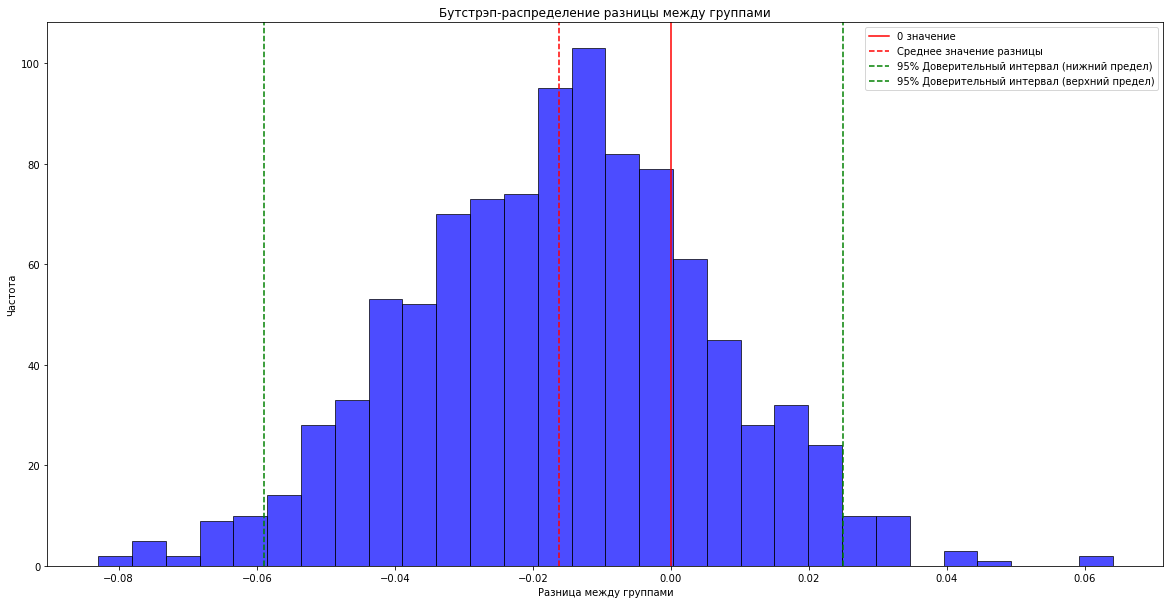

In [139]:
# Рисуем график
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(bootstrap_differences, bins=30, edgecolor='k', alpha=0.7, color='blue')
plt.axvline(x=0, color='red', linestyle='-', label='0 значение')
plt.axvline(x=bootstrap_mean, color='red', linestyle='--', label='Среднее значение разницы')
plt.axvline(x=confidence_interval[0], color='green', linestyle='--', label='95% Доверительный интервал (нижний предел)')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label='95% Доверительный интервал (верхний предел)')
plt.legend(loc='upper right')
plt.xlabel('Разница между группами')
plt.ylabel('Частота')
plt.title('Бутстрэп-распределение разницы между группами')
plt.show()

Доверительный интервал (CI): Доверительный интервал показывает диапазон значений, в котором с некоторой вероятностью (например, 95%) находится разница между группами.
Если доверительный интервал включает ноль: Это может говорить о том, что различия не являются статистически значимыми.
Если доверительный интервал не включает ноль: Это может указывать на статистически значимые различия между группами.

In [136]:
#Bootstrap библиотека

boot_results = bs.bootstrap_ab(test=test_values,ctrl = control_values,stat_func = bs_stats.mean,\
                               compare_func= bs_compare.difference,\
                               alpha=0.05,\
                               return_distribution=True)

borders = np.percentile(boot_results,[2.5,97.5])
borders

array([-0.026,  0.061])

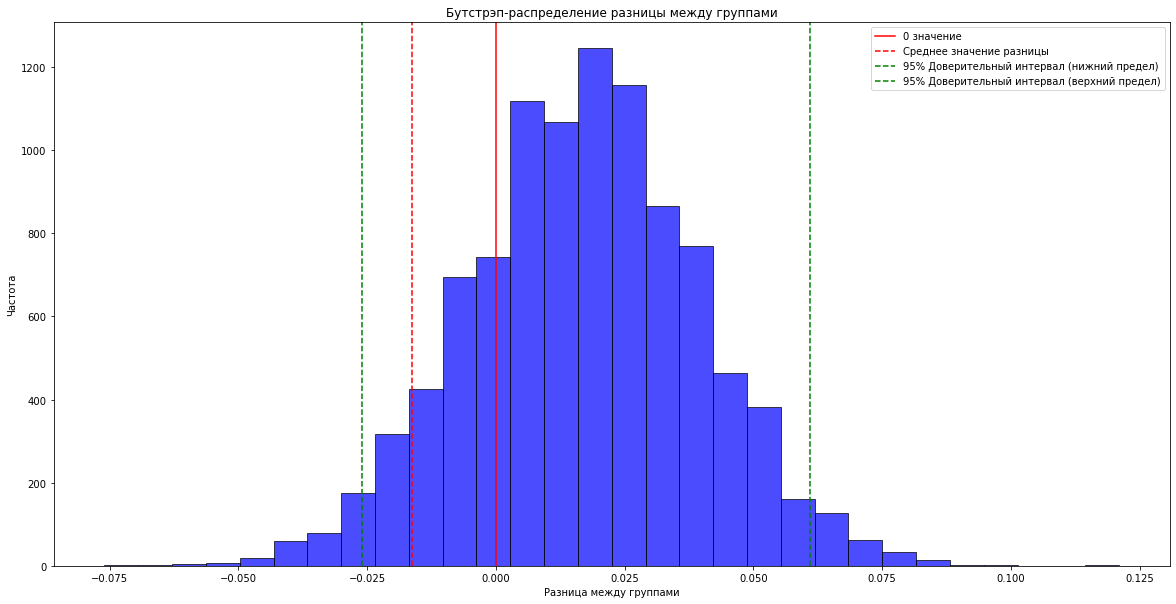

In [138]:
# Рисуем график
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(boot_results, bins=30, edgecolor='k', alpha=0.7, color='blue')
plt.axvline(x=0, color='red', linestyle='-', label='0 значение')
plt.axvline(x=bootstrap_mean, color='red', linestyle='--', label='Среднее значение разницы')
plt.axvline(x=borders[0], color='green', linestyle='--', label='95% Доверительный интервал (нижний предел)')
plt.axvline(x=borders[1], color='green', linestyle='--', label='95% Доверительный интервал (верхний предел)')
plt.legend(loc='upper right')
plt.xlabel('Разница между группами')
plt.ylabel('Частота')
plt.title('Бутстрэп-распределение разницы между группами')
plt.show()

Доверительный интервал (CI): Доверительный интервал показывает диапазон значений, в котором с некоторой вероятностью (например, 95%) находится разница между группами.
Если доверительный интервал включает ноль: Это может говорить о том, что различия не являются статистически значимыми.
Если доверительный интервал не включает ноль: Это может указывать на статистически значимые различия между группами.

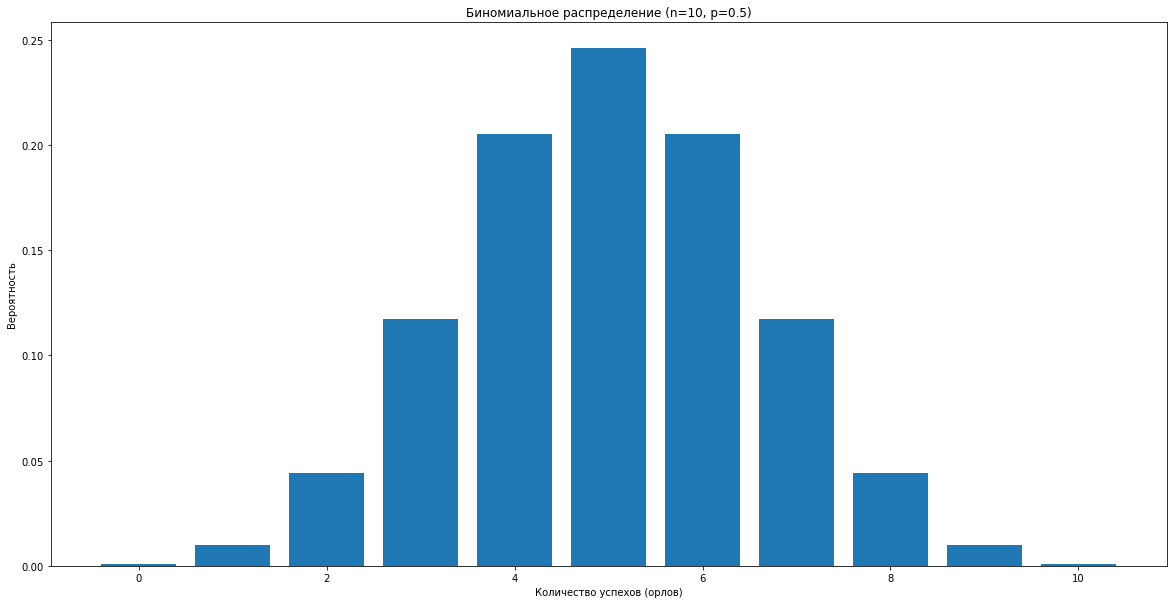

In [140]:
import matplotlib.pyplot as plt
from scipy.stats import binom

# Параметры биномиального распределения
n = 10  # Количество испытаний (бросков монетки)
p = 0.5  # Вероятность успеха (выпадения орла)

# Создаем массив значений k (количество успехов от 0 до n)
k_values = list(range(n + 1))

# Вычисляем вероятности для каждого k
probabilities = [binom.pmf(k, n, p) for k in k_values]

# Строим график
plt.bar(k_values, probabilities)
plt.title('Биномиальное распределение (n=10, p=0.5)')
plt.xlabel('Количество успехов (орлов)')
plt.ylabel('Вероятность')
plt.show()

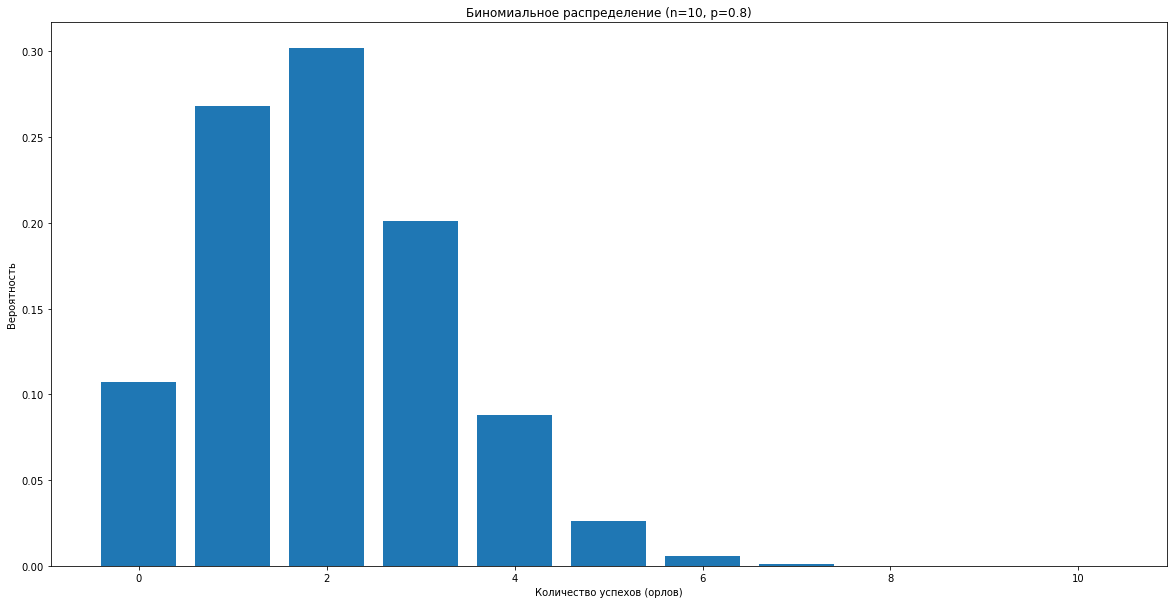

In [142]:
import matplotlib.pyplot as plt
from scipy.stats import binom

# Параметры биномиального распределения
n = 10  # Количество испытаний (бросков монетки)
p = 0.2  # Вероятность успеха (выпадения орла)

# Создаем массив значений k (количество успехов от 0 до n)
k_values = list(range(n + 1))

# Вычисляем вероятности для каждого k
probabilities = [binom.pmf(k, n, p) for k in k_values]

# Строим график
plt.bar(k_values, probabilities)
plt.title('Биномиальное распределение (n=10, p=0.8)')
plt.xlabel('Количество успехов (орлов)')
plt.ylabel('Вероятность')
plt.show()


In [ ]:
from scipy.stats import binom_test


#Для непрерывной переменной - например средний чек

In [ ]:


#Проверка на нормальное распределение тестом Шапиро

from scipy.stats import shapiro

# Проводим тест Шапиро-Уилка
_, p_value = shapiro(control_values)

# Проверяем результат
if p_value > 0.05:
    print("Данные могут быть нормально распределены.")
else:
    print("Данные не являются нормально распределенными.")

#Для непрерывной величины

In [163]:
#Создадим тестовую и контрольную выборки например покупок

test_values = np.random.randint(1000, size=1000)
control_values = np.random.randint(1000,size=1000)

t-тест для разности средних (t-test for Means): Иногда, вместо долей, важно сравнивать средние значения метрики между группами. Тогда можно использовать t-тест, если конверсия измеряется в числовых единицах, например, среднее количество покупок на пользователя.

In [164]:
#T test

test_result = stats.ttest_ind(test_values, control_values)

statistic = test_result[0]
p_value = test_result[1]

print('statistic = ', statistic)
print('p_value = ', p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Not Significant")
else:
    print("Significant Result")

statistic =  -0.8995262371820573
p_value =  0.36848082421745076
Not Significant 0.36848082421745076


In [170]:
#Монавитни тест

stat, p = mannwhitneyu(test_values, control_values)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret

alpha = 0.05

if p >= 0.05:
    print("Not Significant")
else:
    print("Significant Result")

Statistics=488513.500, p=0.374
Not Significant


In [165]:
#Bootstrap 1 ручная версия 

# Количество бутстрэп-подвыборок
n_bootstrap_samples = 1000

# Создаем список, в котором будем хранить разницы между группами для каждой бутстрэп-выборки

bootstrap_differences = []

# Выполняем бутстрэп

for _ in range(n_bootstrap_samples):
    # Генерируем бутстрэп-выборки для обеих групп
    bootstrap_sample_a = np.random.choice(test_values, size=len(test_values), replace=True)
    bootstrap_sample_b = np.random.choice(control_values, size=len(control_values), replace=True)
    
    # Вычисляем метрику для бутстрэп-выборок (например, разницу в конверсии)
    
    metric_a = np.mean(bootstrap_sample_a)
    metric_b = np.mean(bootstrap_sample_b)
    
    difference = metric_b - metric_a
    
    # Добавляем разницу в список
    
    bootstrap_differences.append(difference)

# Вычисляем статистики на основе бутстрэп-распределения
bootstrap_mean = np.mean(bootstrap_differences)
bootstrap_std = np.std(bootstrap_differences)
confidence_interval = np.percentile(bootstrap_differences, [2.5, 97.5])  # 95% доверительный интервал

# Выводим результаты
print(f"Средняя разница: {bootstrap_mean}")
print(f"Стандартная ошибка: {bootstrap_std}")
print(f"95% Доверительный интервал: {confidence_interval}")


Средняя разница: 11.099581000000002
Стандартная ошибка: 13.115854699006048
95% Доверительный интервал: [-14.165675  36.993   ]


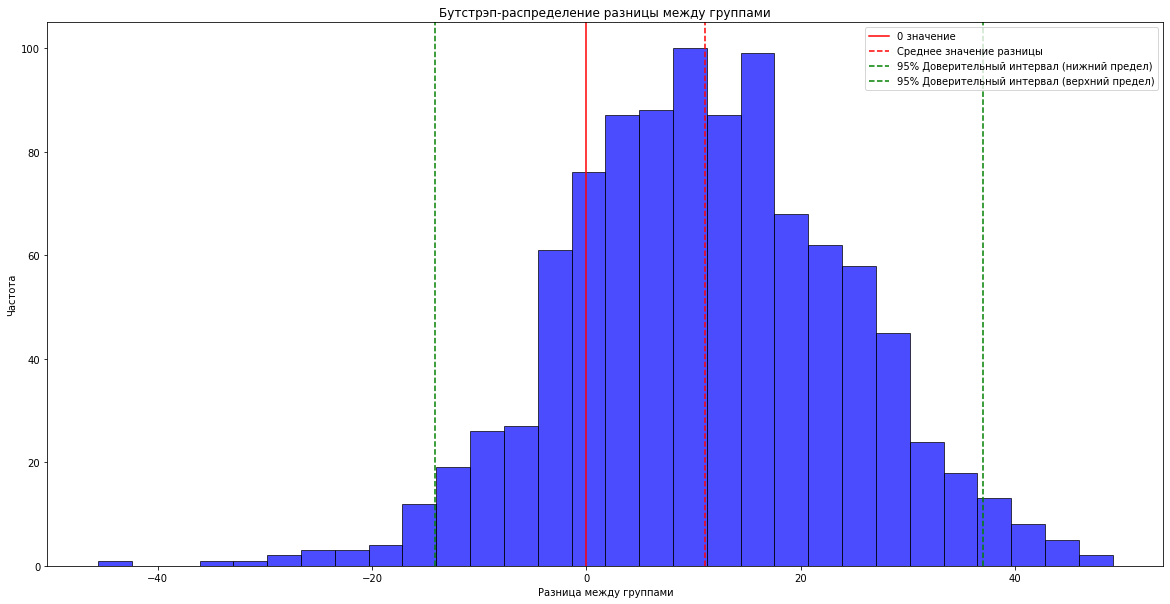

In [166]:
# Рисуем график
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(bootstrap_differences, bins=30, edgecolor='k', alpha=0.7, color='blue')
plt.axvline(x=0, color='red', linestyle='-', label='0 значение')
plt.axvline(x=bootstrap_mean, color='red', linestyle='--', label='Среднее значение разницы')
plt.axvline(x=confidence_interval[0], color='green', linestyle='--', label='95% Доверительный интервал (нижний предел)')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label='95% Доверительный интервал (верхний предел)')
plt.legend(loc='upper right')
plt.xlabel('Разница между группами')
plt.ylabel('Частота')
plt.title('Бутстрэп-распределение разницы между группами')
plt.show()

In [ ]:
#Одиночные тесты

In [ ]:
#MDE - Минимально обнаруживаемый эффект

Минимально обнаруживаемый эффект (Minimum Detectable Effect, MDE) в A/B-тестировании - это минимальное относительное изменение в метрике, которое вы хотите способны обнаружить с заданной статистической мощностью и уровнем значимости. Определение MDE является важной частью проектирования A/B-теста, так как оно помогает определить необходимый размер выборки для достижения заданных статистических целей.

Давайте рассмотрим пример определения MDE на Python. Допустим, у нас есть интернет-магазин, и мы хотим узнать, какое минимальное относительное изменение конверсии (процент пользователей, совершивших покупку) мы можем обнаружить в A/B-тесте.

In [173]:
import numpy as np
import scipy.stats as stats

# Задаем параметры для расчета MDE
baseline_conversion_rate = 0.1  # Базовая конверсия (до теста)
desired_power = 0.8  # Желаемая статистическая мощность (обычно 0.8)
alpha = 0.05  # Уровень значимости (обычно 0.05)

# Задаем размер выборки для контрольной группы
sample_size_control = 1000

# Рассчитываем стандартное отклонение для биномиального распределения
std_dev = np.sqrt((baseline_conversion_rate * (1 - baseline_conversion_rate)) / sample_size_control)

# Рассчитываем Z-значение для заданной статистической мощности
z_value = stats.norm.ppf(1 - alpha/2) + stats.norm.ppf(desired_power)

# Рассчитываем MDE
mde = z_value * std_dev

# Преобразуем MDE в проценты
mde_percentage = mde / baseline_conversion_rate * 100

# Вывод результатов
print(f"Минимально обнаруживаемый эффект (MDE): {mde_percentage:.2f}%")

Минимально обнаруживаемый эффект (MDE): 26.58%


Минимально обнаруживаемый эффект (Minimum Detectable Effect, MDE) для средних используется, когда вы хотите определить, какое минимальное относительное изменение среднего значения метрики вы хотите способны обнаружить в A/B-тесте. Давайте рассмотрим пример определения MDE для средних значений на Python.

Предположим, у вас есть интернет-магазин, и вы хотите определить MDE для среднего чека покупателей (средней суммы покупок). Мы будем использовать библиотеку statsmodels для расчета MDE.

In [ ]:
import statsmodels.stats.api as sms

# Задаем параметры для расчета MDE
baseline_mean = 100  # Базовое среднее значение (до теста)
desired_power = 0.8  # Желаемая статистическая мощность (обычно 0.8)
alpha = 0.05  # Уровень значимости (обычно 0.05)

# Задаем размер выборки для контрольной группы
sample_size_control = 1000

# Задаем размер выборки для тестовой группы (экспериментальной)
sample_size_experiment = sms.tt_ind_solve_power(effect_size=None, alpha=alpha, power=desired_power,
                                                ratio=1.0, nobs1=sample_size_control, alternative='larger')

# Рассчитываем MDE
mde = abs(baseline_mean - baseline_mean * (1 + sample_size_control / sample_size_experiment))

# Вывод результатов
print(f"Минимально обнаруживаемый эффект (MDE): {mde:.2f}")

In [ ]:
#Категориальные переменные

Хи-квадрат тест (Chi-Square Test): Если у вас есть категориальные переменные и вы хотите оценить, есть ли статистически значимая связь между ними и конверсией, то хи-квадрат тест может быть полезным.

Когда вы работаете с категориальными переменными, вы можете использовать различные статистические тесты для анализа влияния этих переменных на исходы или для проверки связей между категориальными переменными. Давайте рассмотрим несколько примеров статистических тестов с категориальными переменными на Python.

1. Хи-квадрат тест для таблиц сопряженности (Chi-Square Test of Independence):
Хи-квадрат тест используется для проверки независимости двух категориальных переменных. Допустим, у нас есть две категориальные переменные A и B, и мы хотим узнать, есть ли статистически значимая связь между ними.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Создаем таблицу сопряженности
data = pd.DataFrame({
    'A': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'B': ['High', 'Low', 'Medium', 'High', 'Low']
})

# Выполняем хи-квадрат тест
chi2, p, _, _ = chi2_contingency(pd.crosstab(data['A'], data['B']))

# Уровень значимости (обычно 0.05)
alpha = 0.05

# Вывод результатов
print(f"Хи-квадрат статистика: {chi2}")
print(f"p-значение: {p}")

# Проверяем статистическую значимость
if p < alpha:
    print("Отвергаем нулевую гипотезу: между переменными есть связь.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: переменные независимы.")

Хи-квадрат тест (Chi-Square Test) может использоваться в A/B-тестировании для анализа связи между категориальными переменными, например, для оценки различий в распределении пользователей между двумя версиями вашего продукта или сайта.

Давайте рассмотрим пример использования хи-квадрат теста в A/B-тестировании на Python:



In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Создаем таблицу сопряженности для A/B-теста (пример)
data = pd.DataFrame({
    'Version_A': [250, 750],  # 250 пользователей в версии A совершили действие, 750 - нет
    'Version_B': [300, 700]   # 300 пользователей в версии B совершили действие, 700 - нет
})

# Выполняем хи-квадрат тест
chi2, p, _, _ = chi2_contingency(data)

# Уровень значимости (обычно 0.05)
alpha = 0.05

# Вывод результатов
print(f"Хи-квадрат статистика: {chi2}")
print(f"p-значение: {p}")

# Проверяем статистическую значимость
if p < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимые различия между версиями A и B.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: различия между версиями A и B не являются статистически значимыми.")

Парный t-тест (Paired t-test) - это статистический тест, который используется для сравнения средних значений двух связанных выборок, то есть выборок, в которых каждое наблюдение в одной выборке соответствует какому-то определенному наблюдению в другой выборке. Этот тест обычно применяется, когда мы хотим оценить различия между двумя условиями или моментами времени для одних и тех же объектов.

Вот как работает парный t-тест:

Формулируется нулевая гипотеза (
H
0
H 
0
​	
 ), которая утверждает, что средние значения двух связанных выборок равны. В других словах, различия между выборками незначительны.
Формулируется альтернативная гипотеза (
H
1
H 
1
​	
 ), которая утверждает, что средние значения двух связанных выборок различаются. В этом случае, различия между выборками считаются статистически значимыми.
Проводится t-тест для оценки статистической значимости различий между средними значениями выборок.
Вычисляется p-значение, которое показывает вероятность получить наблюдаемые различия, если нулевая гипотеза верна.
Если p-значение меньше выбранного уровня значимости (обычно 0.05), нулевая гипотеза отвергается в пользу альтернативной гипотезы, и различия считаются статистически значимыми.
Вот пример использования парного t-теста на Python:

In [ ]:
#Для непрерывной величины

import numpy as np
from scipy import stats

# Создаем две связанные выборки (пример)
np.random.seed(0)
before = np.random.normal(loc=100, scale=10, size=30)  # Исходное состояние
after = before + np.random.normal(loc=5, scale=2, size=30)  # Состояние после воздействия

# Выполняем парный t-тест
t_statistic, p_value = stats.ttest_rel(before, after)

# Уровень значимости (обычно 0.05)
alpha = 0.05

# Вывод результатов
print(f"t-статистика: {t_statistic}")
print(f"p-значение: {p_value}")

# Проверяем статистическую значимость
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения различаются (статистически значимо).")
else:
    print("Не удалось отвергнуть нулевую гипотезу: средние значения не различаются (не статистически значимо).")

#Парный тест на пропорции

Парный тест на пропорции используется для сравнения пропорций в двух связанных выборках. Этот тест позволяет определить, есть ли статистически значимые различия в пропорциях до и после воздействия или в двух схожих условиях.

Вот как работает парный тест на пропорции:

Формулируется нулевая гипотеза (
H
0
H 
0
​	
 ), которая утверждает, что пропорции в двух связанных выборках равны. То есть, различия в пропорциях незначительны.
Формулируется альтернативная гипотеза (
H
1
H 
1
​	
 ), которая утверждает, что пропорции различаются. В этом случае, различия в пропорциях считаются статистически значимыми.
Проводится тест для оценки статистической значимости различий в пропорциях.
Вычисляется p-значение, которое показывает вероятность получить наблюдаемые различия в пропорциях, если нулевая гипотеза верна.
Если p-значение меньше выбранного уровня значимости (обычно 0.05), нулевая гипотеза отвергается в пользу альтернативной гипотезы, и различия считаются статистически значимыми.
Вот пример использования парного теста на пропорции на Python:

In [ ]:
import numpy as np
import scipy.stats as stats

# Создаем две связанные выборки (пример)
np.random.seed(0)
before = np.random.choice([0, 1], size=30, p=[0.7, 0.3])  # Исходная пропорция
after = np.random.choice([0, 1], size=30, p=[0.5, 0.5])  # Пропорция после воздействия

# Выполняем парный тест на пропорции

z_statistic, p_value = stats.binom_test([sum(before), sum(after)], n=len(before), alternative='two-sided')

# Уровень значимости (обычно 0.05)

alpha = 0.05

# Вывод результатов
print(f"Z-статистика: {z_statistic}")
print(f"p-значение: {p_value}")

# Проверяем статистическую значимость
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: пропорции различаются (статистически значимо).")
else:
    print("Не удалось отвергнуть нулевую гипотезу: пропорции не различаются (не статистически значимо).")